In [1]:
pip install syllables

In [2]:
import syllables
import json
import requests
import textblob
import matplotlib.pyplot as plt
import nltk
nltk.download("punkt")
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
# function to draw the plot
def func_plot(xsize,ysize,ylist,charttitle,xtitle):
  plt.gcf().set_size_inches(xsize,ysize)
  plt.xticks(rotation = 45, ha = "right")
  plt.bar(company_list, ylist, color = ['r','b','g','c','m','y'])
  plt.title(charttitle)
  plt.xlabel(xtitle)
  plt.ylabel("Twitter Handle")
  plt.show()

In [4]:
# function to calculate the polarity
def func_polarity(company,datasource):
  polarity_tweet = 0.0
  count = 0  
  for i in datasource:  
    if i["Company"] == company:
      list = []
      list.append(i["Text"])
      for j in list:
        blob = textblob.TextBlob(j)
        polarity_tweet += blob.polarity
        count += 1
  polarity_tweet_average = polarity_tweet/count
  return polarity_tweet_average

In [5]:
# function to calculate the subjectivity
def func_subjectivity(company,datasource):
  subjectivity_tweet = 0.0
  count = 0  
  for i in datasource:  
    if i["Company"] == company:
      list = []
      list.append(i["Text"])
      for j in list:
        blob = textblob.TextBlob(j)
        subjectivity_tweet += blob.subjectivity
        count += 1
  subjectivity_tweet_average = subjectivity_tweet/count
  return subjectivity_tweet_average

In [6]:
# function to calculate the FKGL values
def func_fkgl(company,datasource):
  list = ""
  sentences = 0
  words = 0
  total_syllables =0
  for i in datasource:  
    if i["Company"] == company:
      list += (i["Text"])
  tweet_text = textblob.TextBlob(list)
  for k in tweet_text.sentences:
    sentences += 1
  for l in tweet_text.words:
    words += 1
    total_syllables += syllables.estimate(l)
  fkgl_tweet =(0.39*(words/sentences)) + (11.8*(total_syllables/words)) - 15.59
  return fkgl_tweet

In [7]:
# function to calculate the SMOG values
def func_smog(company,datasource):
  list = ""
  sentences = 0
  polysyllables =0
  for i in datasource:  
    if i["Company"] == company:
      list += (i["Text"])
  tweet_text = textblob.TextBlob(list)
  for k in tweet_text.sentences:
    sentences += 1
  for l in tweet_text.words:
    if syllables.estimate(l) >= 3:
      polysyllables += 1
  smog_tweet = (1.043*((polysyllables*30/sentences)**0.5)) + 3.1291
  return smog_tweet

In [8]:
# function to calculate formality
def func_formality(company,datasource):
  tweet_longtext = ""
  for i in data1:  
    if i["Company"] == company:
      tweet_longtext += (i["Text"])
  f = 0
  c = 0
  tweet_text = textblob.TextBlob(tweet_longtext)
  for word,tag in tweet_text.tags:
    if tag == "NN" or tag == "JJ" or tag == "IN" or tag == "DT":
      # adding nouns, adjectives, prepositions and determiners
      f += 1
    if tag == "PR" or tag == "VB" or tag == "RB" or tag == "UH":
      # adding pronouns, verbs, adverbs and interjections
      c += 1
  formal = 50*((f-c)/(f+c)+1)
  return formal

Welcome to the customer service linguistics analyzer!

Which analysis would you like to perform (Polarity / Subjectivity / Readability / Formality / Search)? Polarity
@sprintcare : 0.1441766155603655
@Ask_Spectrum : 0.2387153826960076
@AskPlayStation : 0.0799678848003847
@XboxSupport : 0.16134886649230387
@UPSHelp : -0.020923390993824426
@AmazonHelp : 0.012632791606541599
@AppleSupport : 0.20552694173881667
@Uber_Support : 0.07891686147186143
@SpotifyCares : 0.14145763313406176
@comcastcares : 0.21032808897121366
@TMobileHelp : 0.2874421763768641
@hulu_support : 0.07364242688792685


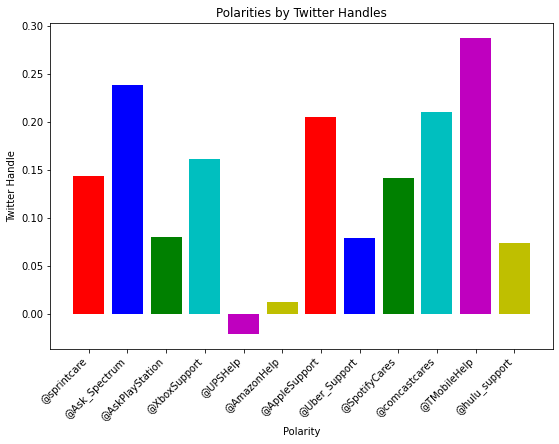


Would you like to run another analysis (yes/no)? yes

Which analysis would you like to perform (Polarity / Subjectivity / Readability / Formality / Search)? search

Which Twitter handle would you like to search? @UPSHelp

Average polarity: -0.020923390993824426
Average subjectivity: 0.4081721997854607
Average Flesch-Kincaid Grade Level: 6.389392230185113
Average SMOG index: 9.42738382498974
Average Formality index: 81.10724549992436

Would you like to run another analysis (yes/no)? YES

Which analysis would you like to perform (Polarity / Subjectivity / Readability / Formality / Search)? profit
Sorry, that type of analysis is not supported. Please try again.

Would you like to run another analysis (yes/no)? Yes

Which analysis would you like to perform (Polarity / Subjectivity / Readability / Formality / Search)? readability

Would you like to analyze FKGL or SMOG? ABCD
Sorry, that type of readability analysis is not supported. Please try again.

Would you like to run another analysis

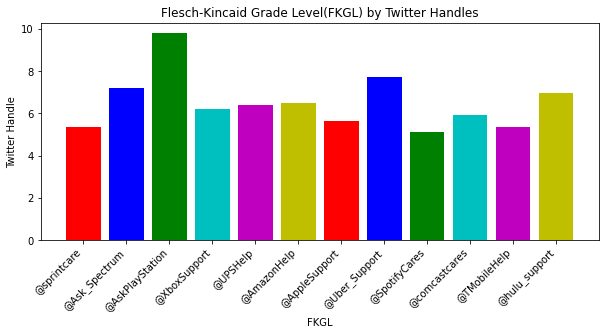


Would you like to run another analysis (yes/no)? YES

Which analysis would you like to perform (Polarity / Subjectivity / Readability / Formality / Search)? search

Which Twitter handle would you like to search? @cocacola
Sorry, that Twitter handle was not found. Please try again.

Would you like to run another analysis (yes/no)? no


In [9]:
print("Welcome to the customer service linguistics analyzer!")
with open("/content/drive/MyDrive/Colab Notebooks/customer_service_tweets_full",'r') as file:
    data = file.read()
data1 = json.loads(data)
company_list = ['@sprintcare', '@Ask_Spectrum', '@AskPlayStation', '@XboxSupport', '@UPSHelp', '@AmazonHelp', '@AppleSupport', '@Uber_Support', '@SpotifyCares', '@comcastcares', '@TMobileHelp', '@hulu_support']

loop = "yes"
while loop == 'yes':
  user_input = input("\nWhich analysis would you like to perform (Polarity / Subjectivity / Readability / Formality / Search)? ").lower()

  if user_input == 'polarity':
    polarity_list = []
    for a in company_list:
      # calling polarity function to calculate polarity
      x = func_polarity(a,data1)
      print(a,":",x)
      polarity_list.append(x)
    
    # calling plot function to draw the graph 
    func_plot(9,6,polarity_list,"Polarities by Twitter Handles","Polarity")

  elif user_input == 'subjectivity':
    subjectivity_list = []
    for a in company_list:
      # calling subjectivity function to calculate subjectivity
      x = func_subjectivity(a,data1)
      print(a,":",x)
      subjectivity_list.append(x)
    
    # calling plot function to draw the graph 
    func_plot(10,4,subjectivity_list,"Subjectivity by Twitter Handles","Subjectivity")

  elif user_input == 'readability':
    user_input1 = input("\nWould you like to analyze FKGL or SMOG? ").lower()
    if user_input1 == 'fkgl':
      fkgl_list = []
      for a in company_list:
        # calling FKGL function to calculate FKGL values
        x = func_fkgl(a,data1)
        print(a,":",x)
        fkgl_list.append(x)

      # calling plot function to draw the graph
      func_plot(10,4,fkgl_list,"Flesch-Kincaid Grade Level(FKGL) by Twitter Handles","FKGL")

    elif user_input1 == 'smog':
      smog_list = []
      for a in company_list:
        # calling SMOG function to calculate smog values 
        x = func_smog(a,data1)
        print(a,":",x)
        smog_list.append(x)

      # calling plot function to draw the graph 
      func_plot(10,4,smog_list,"SMOG by Twitter Handles","SMOG")

    else:
      print("Sorry, that type of readability analysis is not supported. Please try again.")

  elif user_input == 'formality':
    formality_list = []
    for a in company_list:
      # calling formality function to calculate formality values 
      x = func_formality(a,data1)
      print(a,":",x)
      formality_list.append(x)

    # calling plot function to draw the graph 
    func_plot(10,4,formality_list,"Formality by Twitter Handles","Formality")

  elif user_input == 'search':
    userinput2 = input("\nWhich Twitter handle would you like to search? ")

    if userinput2 in company_list:
      print("\nAverage polarity:", func_polarity(userinput2,data1))
      print("Average subjectivity:", func_subjectivity(userinput2,data1))
      print("Average Flesch-Kincaid Grade Level:", func_fkgl(userinput2,data1))
      print("Average SMOG index:", func_smog(userinput2,data1))
      print("Average Formality index:", func_formality(userinput2,data1))

    else:
      print("Sorry, that Twitter handle was not found. Please try again.")
  
  else:
    print("Sorry, that type of analysis is not supported. Please try again.")
  loop = input("\nWould you like to run another analysis (yes/no)? ").lower()
